In [55]:
# Volatility Forecasting and Risk Model Validation
## Notebook 01: Return Construction & Basic Diagnostics

# **Objective:**
# - Construct daily returns from price data
# - Examine basic statistical properties of returns
# - Identify stylized facts relevant for volatility modelling

# **Asset:** NIFTY 50 Index
# **Frequency:** Daily

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [57]:
ticker = "^NSEI"

df = yf.download(
    ticker,
    start="2015-01-01",
    end="2024-12-31",
    progress=False
)

df.head()

/tmp/ipython-input-1656712618.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2015-01-02,8395.450195,8410.599609,8288.700195,8288.700195,101900
2015-01-05,8378.400391,8445.599609,8363.900391,8407.950195,118200
2015-01-06,8127.350098,8327.849609,8111.350098,8325.299805,172800
2015-01-07,8102.100098,8151.200195,8065.450195,8118.649902,164100
2015-01-08,8234.599609,8243.500000,8167.299805,8191.399902,143800


In [58]:
df = df[["Close"]].rename(columns={"Close": "Price"})
df.head()

Price,Price
Ticker,^NSEI
Date,
2015-01-02,8395.450195
2015-01-05,8378.400391
2015-01-06,8127.350098
2015-01-07,8102.100098
2015-01-08,8234.599609


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2458 entries, 2015-01-02 to 2024-12-30
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Price, ^NSEI)  2458 non-null   float64
dtypes: float64(1)
memory usage: 38.4 KB


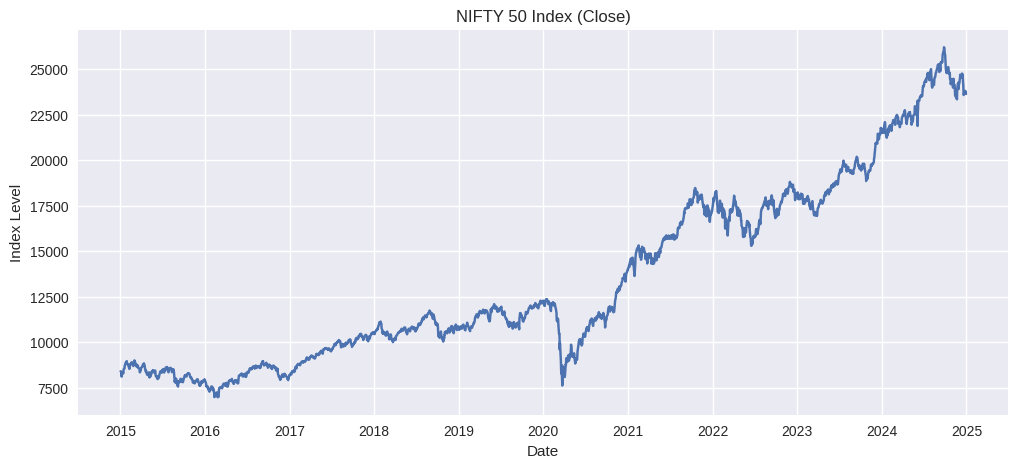

In [60]:
plt.figure(figsize=(12,5))
plt.plot(df["Price"])
plt.title("NIFTY 50 Index (Close)")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.show()


In [61]:
df["log_return"] = np.log(df["Price"] / df["Price"].shift(1))
returns = df["log_return"].dropna()

returns.head()

,log_return
Date,
2015-01-05,-0.002033
2015-01-06,-0.030422
2015-01-07,-0.003112
2015-01-08,0.016221
2015-01-09,0.006042


In [62]:
df.head()

Price,Price,log_return
Ticker,^NSEI,
Date,,
2015-01-02,8395.450195,NaN
2015-01-05,8378.400391,-0.002033
2015-01-06,8127.350098,-0.030422
2015-01-07,8102.100098,-0.003112
2015-01-08,8234.599609,0.016221


In [65]:
df.columns = df.columns.get_level_values(0)
df = df.rename(columns={"Adj Close": "Price"})
df.head()

Price,Price,log_return
Date,,
2015-01-02,8395.450195,NaN
2015-01-05,8378.400391,-0.002033
2015-01-06,8127.350098,-0.030422
2015-01-07,8102.100098,-0.003112
2015-01-08,8234.599609,0.016221
